In [1]:
import os
import sys
import json

import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from tqdm import tqdm

# 定义转换
transform = transforms.Compose([
    transforms.Resize((14,14)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # 使用单个值进行归一化
])

# 加载 CIFAR-100 训练集
# trainset = torchvision.datasets.CIFAR100(root='./data', train=True,download=True, transform=transform)

# 加载 MNIST 训练集
trainset = torchvision.datasets.MNIST(root='./data', train=True,download=True, transform=transform)
# print(len(trainset))
dataNum = 1000

# 定义想要的类别
# filtered_classes = ['bear', 'tiger']

# 定义想要的类别
filtered_classes = [
    '0 - zero',
    '1 - one',
    '2 - two',
    '3 - three',
    '4 - four',
    '5 - five',
    '6 - six',
    '7 - seven',
    '8 - eight',
    '9 - nine'
  ]


# 获取类别到索引的映射
class_to_idx = trainset.class_to_idx

print(class_to_idx)
# 筛选出对应索引
filtered_class_indices = [class_to_idx[cls] for cls in filtered_classes]

# 过滤数据集
filtered_trainset = [data for data in trainset if data[1] in filtered_class_indices]
# trainset = trainset[:dataNum]

# 过滤数据集并修改标签
filtered_trainset = []
for data, label in trainset:
    if label in filtered_class_indices:
        # 将 'bear' 的标签设置为 0，'tiger' 的标签设置为 1
        # new_label = 0 if label == filtered_class_indices[0] else 1

        # 将 '0' 的标签设置为 0，'1' 的标签设置为 1
        new_label = 0
        for i in range(0, len(filtered_class_indices)):
          if label == filtered_class_indices[i]:
            new_label = i

        filtered_trainset.append((data, new_label))



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 64264279.32it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 36052289.83it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden




100%|██████████| 1648877/1648877 [00:00<00:00, 22101572.31it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4054166.58it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



{'0 - zero': 0, '1 - one': 1, '2 - two': 2, '3 - three': 3, '4 - four': 4, '5 - five': 5, '6 - six': 6, '7 - seven': 7, '8 - eight': 8, '9 - nine': 9}


In [2]:
datasetNum = 1000
print(len(filtered_trainset))
filtered_trainset = filtered_trainset[:datasetNum]
print(len(filtered_trainset))

# 划分训练集和验证集
train_size = int(0.8 * len(filtered_trainset))
validation_size = len(filtered_trainset) - train_size
train_dataset, validation_dataset = torch.utils.data.random_split(filtered_trainset, [train_size, validation_size])

print(train_size)
print(validation_size)
# 创建 DataLoader
# trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
# validationloader = torch.utils.data.DataLoader(validation_dataset, batch_size=4, shuffle=False, num_workers=2)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
validationloader = torch.utils.data.DataLoader(validation_dataset, batch_size=16, shuffle=False, num_workers=2)


train_num = train_size
val_num = validation_size

60000
1000
800
200


In [3]:
print(filtered_class_indices)
print(trainloader)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [4]:
import os
from google.colab import drive
import pickle
drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/QML-mnist')
os.getcwd()


with open('demo12', 'rb') as fo:
    demodict = pickle.load(fo, encoding='bytes')
    print(demodict)


Mounted at /content/drive
{b'filenames': [b'bear_s_000038.png', b'bear_s_000727.png', b'bear_s_001557.png', b'bear_s_000192.png', b'bear_cub_s_000608.png', b'bear_s_001317.png', b'panthera_tigris_s_000829.png', b'tiger_s_001182.png', b'panthera_tigris_s_000375.png', b'panthera_tigris_s_000274.png', b'tiger_s_000261.png', b'tiger_s_000729.png'], b'fine_labels': [3, 3, 3, 3, 3, 3, 88, 88, 88, 88, 88, 88], b'coarse_labels': [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], b'data': [array([205, 208, 215, ..., 102,  78,  75], dtype=uint8), array([181, 168, 154, ...,  96,  85,  78], dtype=uint8), array([ 40,  33,  33, ..., 124, 103,  15], dtype=uint8), array([ 43,  57,  56, ..., 114,  91,  87], dtype=uint8), array([255, 253, 252, ..., 126, 112,  88], dtype=uint8), array([125, 148, 156, ..., 129, 134, 134], dtype=uint8), array([150, 122, 115, ...,  24,  25,  25], dtype=uint8), array([255, 255, 255, ..., 255, 254, 255], dtype=uint8), array([58, 58, 56, ..., 41, 35, 39], dtype=uint8), array([171, 152, 125

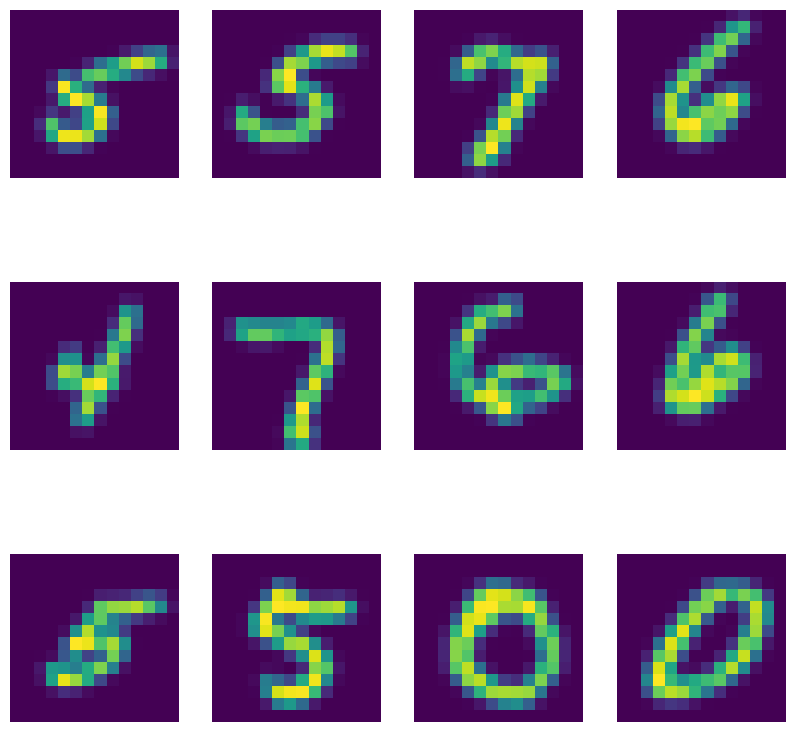

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 获取一个批次的数据
images, labels = next(iter(trainloader))
print(trainloader)

# 设置图像显示的行数和列数
rows = 3
cols = 4

# 创建一个图形和一组子图
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

# 遍历所有图像
for i in range(rows*cols):
    image = images[i].numpy() # 转换为 numpy 数组
    image = np.transpose(image, (1, 2, 0)) # 调整通道顺序
    #print(image.shape)
    # 显示图像
    ax = axes[i//cols, i%cols]
    ax.imshow(image)
    ax.axis('off') # 关闭坐标轴

plt.show()


In [6]:
import pickle
import numpy as np
import torch

# 获取一个批次的数据
images, labels = next(iter(trainloader))

# 将数据转化为字典结构
data = {
    b'filenames': [],  # 根据需要添加文件名
    b'fine_labels': labels.numpy().tolist(),
    b'coarse_labels': [7]*len(labels),  # 如果需要 coarse_labels, 添加相应的值
    b'data': []
}

# 遍历所有图像
for i in range(len(images)):
    label = labels[i].item()  # 获取标签
    unique_id = i  # 这里用索引作为唯一编号，你也可以用其他方法生成唯一编号
    filename = f"number{label}_id{unique_id}.png"


    # 添加文件名到列表
    data[b'filenames'].append(filename.encode('utf-8'))  # 转换为字节字符串
    image = images[i].numpy()  # 转换为 numpy 数组
    image = np.transpose(image, (1, 2, 0))  # 调整通道顺序 (C, H, W) -> (H, W, C)
    image = image.flatten()  # 展平为一维数组
    data[b'data'].append(image)

# 转换成 numpy 数组类型
data[b'data'] = [np.array(d, dtype=np.uint8) for d in data[b'data']]


# 保存到 pickle 文件
with open('demoPic.pkl', 'wb') as f:
    pickle.dump(data, f)

print(data)


{b'filenames': [b'number0_id0.png', b'number5_id1.png', b'number1_id2.png', b'number1_id3.png', b'number5_id4.png', b'number7_id5.png', b'number4_id6.png', b'number7_id7.png', b'number5_id8.png', b'number0_id9.png', b'number0_id10.png', b'number7_id11.png', b'number9_id12.png', b'number0_id13.png', b'number2_id14.png', b'number5_id15.png'], b'fine_labels': [0, 5, 1, 1, 5, 7, 4, 7, 5, 0, 0, 7, 9, 0, 2, 5], b'coarse_labels': [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], b'data': [array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
       255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
         0, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
         0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
         0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,
         

In [7]:
# @title hybrid layer
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# !pip install pennylane
!pip install pennylane==0.23.0
# !pip install pennylane
# !pip uninstall autoray
!pip install autoray==0.2.5
# !pip install pennylane-qulacs
import torch
import torch.nn as nn
import numpy as np
import pennylane as qml
from math import ceil
from math import pi

torch.manual_seed(0)

n_qubits = 4
n_layers = 1
# n_class = 2
n_class = 10
n_features = 196
image_x_y_dim = 14
kernel_size = n_qubits
stride = 2

dev = qml.device("default.qubit", wires=n_qubits)


def circuit(inputs, weights):
    var_per_qubit = int(len(inputs) / n_qubits) + 1
    encoding_gates = ['RZ', 'RY'] * ceil(var_per_qubit / 2)
    for qub in range(n_qubits):
        qml.Hadamard(wires=qub)
        for i in range(var_per_qubit):
            if (qub * var_per_qubit + i) < len(inputs):
                exec('qml.{}({}, wires = {})'.format(encoding_gates[i], inputs[qub * var_per_qubit + i], qub))
            else:  # load nothing
                pass

    for l in range(n_layers):
        for i in range(n_qubits):
            qml.CRZ(weights[l, i], wires=[i, (i + 1) % n_qubits])
            # qml.CNOT(wires = [i, (i + 1) % n_qubits])
        for j in range(n_qubits, 2 * n_qubits):
            qml.RY(weights[l, j], wires=j % n_qubits)

    _expectations = [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]
    return _expectations
    # return qml.expval(qml.PauliZ(0))


class Quanv2d(nn.Module):
    def __init__(self, kernel_size=None, stride=None):
        super(Quanv2d, self).__init__()
        weight_shapes = {"weights": (n_layers, 2 * n_qubits)}
        qnode = qml.QNode(circuit, dev, interface='torch', diff_method='best')
        self.ql1 = qml.qnn.TorchLayer(qnode, weight_shapes)
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, X):
        assert len(X.shape) == 4
        bs = X.shape[0]
        XL = []
        for i in range(0, X.shape[2] - 2, stride):
            for j in range(0, X.shape[3] - 2, stride):
                XL.append(self.ql1(torch.flatten(X[:, :, i:i + kernel_size, j:j + kernel_size], start_dim=1)))
        X = torch.cat(XL, dim=1).view(bs,4,6,6)
        return X


class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.ql1 = Quanv2d(kernel_size=kernel_size, stride=stride)
        self.conv1 = nn.Conv2d(4,16,3,stride=1)
        self.fc1 = nn.Linear(16*4*4, n_class * 2)
        self.lr1 = nn.LeakyReLU(0.1)
        self.fc2 = nn.Linear(n_class * 2, n_class)

    def forward(self, X):
        bs = X.shape[0]
        X = X.view(bs, 1, image_x_y_dim, image_x_y_dim)
        X = self.ql1(X)
        X = self.lr1(self.conv1(X))
        X = X.view(bs,-1)
        X = self.fc1(X)
        X = self.lr1(X)
        X = self.fc2(X)
        return X


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.2/914.2 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 66.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pennylane-lightning to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 23.5 MB/s eta 0:00:00
INFO: pip is looking at multiple 

In [8]:
#24
from google.colab import drive
drive.mount('/content/drive')

!nvidia-smi
import os
os.chdir('/content/drive/My Drive')
os.getcwd()
os.chdir('/content/drive/My Drive/QML')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/bin/bash: line 1: nvidia-smi: command not found


'/content/drive/My Drive/QML'

In [9]:



import torch.nn.functional as F
kernel_size=2
save_path='/content/drive/My Drive/QML-mnist/model/qmodel-mnist.pth'

def circuit(inputs, weights):
    var_per_qubit = int(len(inputs) / n_qubits) + 1
    encoding_gates = ['RZ', 'RY'] * ceil(var_per_qubit / 2)

    for qub in range(n_qubits):
        qml.Hadamard(wires=qub)
        for i in range(var_per_qubit):
            idx = qub * var_per_qubit + i
            if idx < len(inputs):
                if encoding_gates[i] == 'RZ':
                    qml.RZ(inputs[idx], wires=qub)
                elif encoding_gates[i] == 'RY':
                    qml.RY(inputs[idx], wires=qub)

    for l in range(n_layers):
        for i in range(n_qubits):
            qml.CRZ(weights[l, i], wires=[i, (i + 1) % n_qubits])
        for j in range(n_qubits, 2 * n_qubits):
            qml.RY(weights[l, j], wires=j % n_qubits)

    _expectations = [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]
    return _expectations

class Quanv2d(nn.Module):
    def __init__(self, kernel_size=None, stride=None):
        super(Quanv2d, self).__init__()
        weight_shapes = {"weights": (n_layers, 2 * n_qubits)}
        qnode = qml.QNode(circuit, dev, interface='torch', diff_method='best')
        self.ql1 = qml.qnn.TorchLayer(qnode, weight_shapes)
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, X):
        assert len(X.shape) == 4
        bs = X.shape[0]
        XL = []
        for i in range(0, X.shape[2] - 2, stride):
            for j in range(0, X.shape[3] - 2, stride):
                XL.append(self.ql1(torch.flatten(X[:, :, i:i + kernel_size, j:j + kernel_size], start_dim=1)))
        X = torch.cat(XL, dim=1).view(bs,4,6,6)
        return X


class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.ql1 = Quanv2d(kernel_size=kernel_size, stride=stride)
        self.conv1 = nn.Conv2d(4,16,3,stride=1)
        self.fc1 = nn.Linear(16*4*4, n_class * 2)
        self.lr1 = nn.LeakyReLU(0.1)
        self.fc2 = nn.Linear(n_class * 2, n_class)

    def forward(self, X):
        bs = X.shape[0]
        X = X.view(bs, 1, image_x_y_dim, image_x_y_dim)
        X = self.ql1(X) #output(bs, 4, 6, 6)
        X = self.lr1(self.conv1(X))
        X = X.view(bs,-1)
        X = self.fc1(X)
        X = self.lr1(X)
        X = self.fc2(X)
        return X


def main():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("using {} device.".format(device))

#




    batch_size = 20
    train_num = len(trainloader)
    # val_num = len(validate_dataset)


    print("using {} images for training, {} images for validation.".format(train_num,
                                                                           val_num))



    net = Net()
    # net =SimpleNet()
    net.to(device)
    loss_function = nn.CrossEntropyLoss()
    # pata = list(net.parameters())
    optimizer = optim.Adam(net.parameters(), lr=0.0002)

    '''測試一下'''
    # epochs = 10
    epochs = 6
    # save_path = './AlexNet.pth'
    best_acc = 0.0
    train_steps = len(trainloader)

    # torch.save(net.state_dict(), save_path)

    for epoch in range(epochs):
        # train
        net.train()


        index = 0
        running_loss = 0.0
        train_bar = tqdm(trainloader, file=sys.stdout)
        for step, data in enumerate(train_bar):
            index+=1
            print('data')
            print(data)
            images, labels = data
            print(images.shape)
            print(labels)
            optimizer.zero_grad()
            outputs = net(images.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()

            train_bar.desc = "train epoch[{}/{}] loss:{:.3f}".format(epoch + 1,
                                                                     epochs,
                                                                     loss)

        # validate
        net.eval()
        acc = 0.0  # accumulate accurate number / epoch
        with torch.no_grad():
            val_bar = tqdm(validationloader, file=sys.stdout)
            for val_data in val_bar:
                val_images, val_labels = val_data
                outputs = net(val_images.to(device))
                predict_y = torch.max(outputs, dim=1)[1]
                acc += torch.eq(predict_y, val_labels.to(device)).sum().item()

        val_accurate = acc / val_num
        print('[epoch %d] train_loss: %.3f  val_accuracy: %.3f' %
              (epoch + 1, running_loss / train_steps, val_accurate))

        if val_accurate > best_acc:
            best_acc = val_accurate
            torch.save(net.state_dict(), save_path)

    print('Finished Training')


if __name__ == '__main__':
    main()

串流輸出內容已截斷至最後 5000 行。
          [-1.0000, -1.0000, -0.9843,  ..., -0.9216, -0.9765, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]]]), tensor([5, 2, 6, 4, 2, 4, 9, 1, 7, 7, 0, 5, 2, 7, 8, 2])]
torch.Size([16, 1, 14, 14])
tensor([5, 2, 6, 4, 2, 4, 9, 1, 7, 7, 0, 5, 2, 7, 8, 2])
train epoch[5/6] loss:2.204:  28%|██▊       | 14/50 [02:48<07:07, 11.88s/it]data
[tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [

In [10]:
print("finish")

finish
